# About Dataset:

****Here we have two datasets. First one is trained dataset and the second one is tested dataset.****

****First dataset(DataGoogle.csv) has information about the google stock prices from year 2012 to 2016. It contains 6 columns whose details are given below:****
>* Date: It contains the particular date of the stock price details.
>* Open: The opening price of the google stock.
>* High: Highest price of the stock on that day.
>* Low: Lowest price of the stock that day.
>* Close: Closing price of the stock that day.
>* Volume: Volume of the stock on that particular day.

****Second dataset(GoogleTest_data.csv) is our test data. It contains 7 columns whose details are given below:****
>* Date: It contains the particular date of the stock price details.
>* Open: The opening price of the google stock.
>* High: Highest price of the stock on that day.
>* Low: Lowest price of the stock that day.
>* Close: Closing price of the stock that day.
>* Adj Close: Adj closing price of the stock.
>* Volume: Volume of the stock on that particular day.

In [1]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

2024-04-03 14:59:12.934390: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 14:59:12.934488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 14:59:13.067761: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#load google trained dataset
data = pd.read_csv('../input/google/DataGoogle.csv')

In [3]:
#check head of the dataset
data.head().style.set_properties(**{'background-color': 'black',
                                    'color': 'cyan',
                                    'border': '1.5px  white'})

,Date,Open,High,Low,Close,Volume
0,01-04-2012,331.270000,333.870000,329.080000,666.45,"57,49,400"
1,01-05-2012,329.830000,330.750000,326.890000,657.21,"65,90,300"
2,01-06-2012,328.340000,328.770000,323.680000,648.24,"54,05,900"
3,01-09-2012,322.040000,322.290000,309.460000,620.76,"1,16,88,800"
4,01-10-2012,313.700000,315.720000,307.300000,621.43,"88,24,000"


In [4]:
#check the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1256 non-null   object 
 1   Open    1256 non-null   float64
 2   High    1256 non-null   float64
 3   Low     1256 non-null   float64
 4   Close   1256 non-null   object 
 5   Volume  1256 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.0+ KB


In [5]:
#convert close coloumn datatype from object to numaric 
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [6]:
#check the datatype information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1147 non-null   object 
 1   Open    1147 non-null   float64
 2   High    1147 non-null   float64
 3   Low     1147 non-null   float64
 4   Close   1147 non-null   float64
 5   Volume  1147 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.7+ KB


In [7]:
#rescale data between 0 & 1
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1147, 1)

In [8]:
#prepare data for training
X_train = []
y_train = []

for i in range (60,1147): #60 : timestep // 1147 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
#check the shape
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1087, 60, 1)

In [10]:
#build the model
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
#train the data
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
34/34 - 6s - 170ms/step - loss: 0.0378
Epoch 2/20
34/34 - 1s - 17ms/step - loss: 0.0112
Epoch 3/20
34/34 - 1s - 17ms/step - loss: 0.0089
Epoch 4/20
34/34 - 1s - 17ms/step - loss: 0.0079
Epoch 5/20
34/34 - 1s - 17ms/step - loss: 0.0075
Epoch 6/20
34/34 - 1s - 17ms/step - loss: 0.0065
Epoch 7/20
34/34 - 1s - 17ms/step - loss: 0.0073
Epoch 8/20
34/34 - 1s - 17ms/step - loss: 0.0061
Epoch 9/20
34/34 - 1s - 17ms/step - loss: 0.0060
Epoch 10/20
34/34 - 1s - 17ms/step - loss: 0.0069
Epoch 11/20
34/34 - 1s - 17ms/step - loss: 0.0062
Epoch 12/20
34/34 - 1s - 17ms/step - loss: 0.0051
Epoch 13/20
34/34 - 1s - 17ms/step - loss: 0.0057
Epoch 14/20
34/34 - 1s - 17ms/step - loss: 0.0046
Epoch 15/20
34/34 - 1s - 17ms/step - loss: 0.0051
Epoch 16/20
34/34 - 1s - 17ms/step - loss: 0.0051
Epoch 17/20
34/34 - 1s - 17ms/step - loss: 0.0057
Epoch 18/20
34/34 - 1s - 17ms/step - loss: 0.0045
Epoch 19/20
34/34 - 1s - 17ms/step - loss: 0.0045
Epoch 20/20
34/34 - 1s - 17ms/step - loss: 0.0045


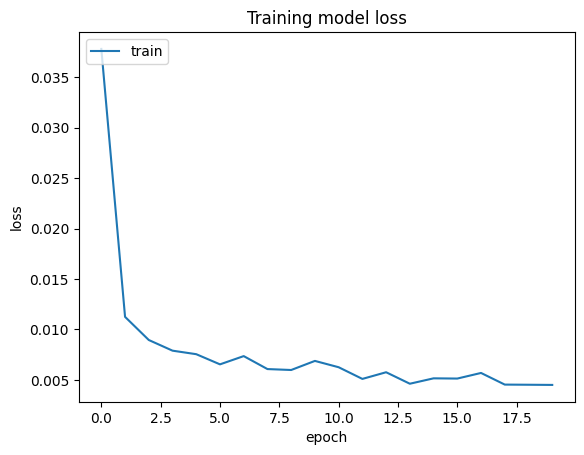

In [12]:
#visualising the model
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
#test the model with new dataset
testData = pd.read_csv('../input/google/GoogleTest_Data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(190, 60, 1)

In [14]:
#predicting the model & check the values
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


array([[1.1937017],
       [1.19198  ],
       [1.2066526],
       [1.2277226],
       [1.2382348],
       [1.2247889],
       [1.1968224],
       [1.1721196],
       [1.1672219],
       [1.1767169],
       [1.1733465],
       [1.1597732],
       [1.1496512],
       [1.1411705],
       [1.1450815],
       [1.1562884],
       [1.1854889],
       [1.222812 ],
       [1.2572235],
       [1.2854908],
       [1.2794365],
       [1.2568244],
       [1.2194268],
       [1.1827934],
       [1.1627474],
       [1.1647568],
       [1.1793647],
       [1.1877351],
       [1.1760489],
       [1.1580396],
       [1.1412449],
       [1.1243119],
       [1.0977043],
       [1.0671331],
       [1.0673484],
       [1.0961032],
       [1.1323537],
       [1.160173 ],
       [1.1784959],
       [1.1757392],
       [1.1809262],
       [1.1956561],
       [1.2157556],
       [1.2328489],
       [1.240867 ],
       [1.2350881],
       [1.2162222],
       [1.208161 ],
       [1.2147626],
       [1.2325618],


In [15]:
#plot the data between actual and predicting stock price
predicted_price = sc.inverse_transform(y_pred)

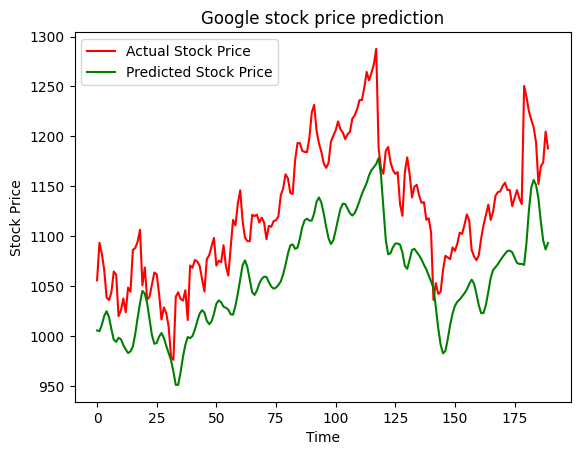

In [16]:
#visualization the actual stock proce & predicting stock proce
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()